# POLI 175 - Machine Learning for Social Sciences

## Python Refresh II

---

# Data Science with Pandas

## Load Pandas and Numpy

To get started, let us load Pandas and Numpy:

In [1]:
# My code here
import pandas as pd
import numpy as np

## Load Datasets

We will load three datasets here:

In [2]:
# My code here
perisk = pd.read_csv('https://raw.githubusercontent.com/umbertomig/qtm151/main/datasets/PErisk.csv')
tips = pd.read_csv('https://raw.githubusercontent.com/umbertomig/qtm151/main/datasets/tips.csv')

**Exercise**: Explore the datasets we just loaded.

In [3]:
## Your answers here!
perisk.head()

,country,courts,barb2,prsexp2,prscorr2,gdpw2
0,Argentina,0,-0.720775,1,3,9.690170
1,Australia,1,-6.907755,5,4,10.304840
2,Austria,1,-4.910337,5,4,10.100940
3,Bangladesh,0,0.775975,1,0,8.379768
4,Belgium,1,-4.617344,5,4,10.250120


In [4]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


## Counting

### Counting data

To count data we need to:

```
dat["variable"].value_counts()
```

If we want it sorted, we can type:

```
dat["variable"].value_counts(sort = True)
```

We can also count proportions:

```
dat["variable"].value_counts(normalize = True)
```

Let's try?!

### Detecting missing data

We can also detect missing data using the function:

```
dat.isna()
```

And if we want, count the missing data by variable:

```
dat.isna().sum()
```

Ultimately, to remove the missing we should:

```
dat.dropna()
```

Or we can fill the missing with a custom value (proceed with caution here!)

```
dat.fillna(0)
```

In [5]:
# My code here
perisk['prsexp2'].value_counts(sort = False, normalize = True)

0    0.032258
1    0.096774
2    0.112903
3    0.306452
4    0.225806
5    0.225806
Name: prsexp2, dtype: float64

In [6]:
perisk['prsexp2'].value_counts(sort = False)

0     2
1     6
2     7
3    19
4    14
5    14
Name: prsexp2, dtype: int64

In [7]:
perisk['prsexp2'].value_counts()

3    19
5    14
4    14
2     7
1     6
0     2
Name: prsexp2, dtype: int64

In [8]:
perisk.isna()

,country,courts,barb2,prsexp2,prscorr2,gdpw2
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
57,False,False,False,False,False,False
58,False,False,False,False,False,False
59,False,False,False,False,False,False
60,False,False,False,False,False,False


In [9]:
perisk

,country,courts,barb2,prsexp2,prscorr2,gdpw2
0,Argentina,0,-0.720775,1,3,9.690170
1,Australia,1,-6.907755,5,4,10.304840
2,Austria,1,-4.910337,5,4,10.100940
3,Bangladesh,0,0.775975,1,0,8.379768
4,Belgium,1,-4.617344,5,4,10.250120
...,...,...,...,...,...,...
57,United Kingdom,1,-6.907755,5,5,10.127270
58,Uruguay,0,-2.127775,2,2,9.414342
59,Venezuela,1,0.428845,3,2,9.848820
60,Zambia,0,0.965810,3,1,7.726213


In [10]:
perisk.isna().sum()

country     0
courts      0
barb2       0
prsexp2     0
prscorr2    0
gdpw2       0
dtype: int64

**Exercise**: Count the number of `tips` by week day. Then, normalize to have the proportions.

In [11]:
## Your answers here!
tips.isna().sum()

obs        0
totbill    0
tip        0
sex        0
smoker     0
day        0
time       0
size       0
dtype: int64

In [12]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [13]:
tips['day'].value_counts()

Sat    87
Sun    76
Thu    62
Fri    19
Name: day, dtype: int64

In [14]:
tips['day'].value_counts(sort = False)

Sun    76
Thu    62
Sat    87
Fri    19
Name: day, dtype: int64

In [15]:
tips['day'].value_counts(normalize = True)

Sat    0.356557
Sun    0.311475
Thu    0.254098
Fri    0.077869
Name: day, dtype: float64

In [16]:
tips['smoker'].value_counts(normalize = True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

## Summary by groups

Suppose we want the mean of gdp by countries with and without courts. There are two ways:

```
# Hard way
perisk[perisk['courts'] == 0]['gdpw2'].mean()
perisk[perisk['courts'] == 1]['gdpw2'].mean()
```

Or, we can use the `groupby` function in Pandas:

```
# Easy way
perisk.groupby("courts")["gdpw2"].mean()
```

In [17]:
# My code here
np.exp(perisk[perisk['courts'] == 0]['gdpw2'].mean()), np.exp(perisk[perisk['courts'] == 1]['gdpw2'].mean())

(4947.680291027636, 16183.723367095039)

In [18]:
np.exp(perisk.groupby("courts")["gdpw2"].mean())

courts
0     4947.680291
1    16183.723367
Name: gdpw2, dtype: float64

In [19]:
perisk.head()

,country,courts,barb2,prsexp2,prscorr2,gdpw2
0,Argentina,0,-0.720775,1,3,9.690170
1,Australia,1,-6.907755,5,4,10.304840
2,Austria,1,-4.910337,5,4,10.100940
3,Bangladesh,0,0.775975,1,0,8.379768
4,Belgium,1,-4.617344,5,4,10.250120


In [20]:
np.exp(perisk.groupby("prsexp2")["gdpw2"].mean())

prsexp2
0     7909.568436
1     4834.370325
2     5975.682352
3     5506.558444
4     7687.217891
5    25323.369109
Name: gdpw2, dtype: float64

In [21]:
np.exp(perisk.groupby("prscorr2")["gdpw2"].mean())

prscorr2
0     3773.130095
1     3438.859593
2     6268.252862
3    10557.772910
4    19116.261228
5    26577.504579
Name: gdpw2, dtype: float64

**Exercise**: In the `tips` dataset, compute the mean of tips by weekday.

In [22]:
## Your answers here!
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [23]:
tips.groupby('day')['tip'].sum()

day
Fri     51.96
Sat    260.40
Sun    247.39
Thu    171.83
Name: tip, dtype: float64

In [24]:
tips.groupby('day')['tip'].mean()

day
Fri    2.734737
Sat    2.993103
Sun    3.255132
Thu    2.771452
Name: tip, dtype: float64

### Summary by groups (multiple functions)

To group results by multiple functions, we can simply:

```
dat.groupby("var_group")["var_stat"].agg([stat1, stat2, stat3])
```

### Summary by groups (multiple levels)

To group results by multiple levels, we can simply:

```
dat.groupby(["varlevel1", "varlevel2"])["var_stat"].mean()
```

In [25]:
# My code here
perisk.head()

,country,courts,barb2,prsexp2,prscorr2,gdpw2
0,Argentina,0,-0.720775,1,3,9.690170
1,Australia,1,-6.907755,5,4,10.304840
2,Austria,1,-4.910337,5,4,10.100940
3,Bangladesh,0,0.775975,1,0,8.379768
4,Belgium,1,-4.617344,5,4,10.250120


In [26]:
perisk.groupby("courts")["gdpw2"].agg([min, max])

,min,max
courts,,
0,7.029973,10.06777
1,8.126518,10.41018


In [27]:
np.exp(perisk.groupby(["courts", "prsexp2"])["gdpw2"].mean())

courts  prsexp2
0       0           7909.568436
        1           4834.370325
        2           5975.682352
        3           4325.711870
        4           4715.831823
1       3          10823.898581
        4          10084.726528
        5          25323.369109
Name: gdpw2, dtype: float64

**Exercise**: For the `tips` dataset:

1. Compute maximum, minimum, and sum of tips by weekday
2. Compute the sum of tips by weekday and day time.

In [28]:
## Your answers here!
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [29]:
tips.groupby("day")["tip"].agg([min, max, sum])

,min,max,sum
day,,,
Fri,1.00,4.73,51.96
Sat,1.00,10.00,260.40
Sun,1.01,6.50,247.39
Thu,1.25,6.70,171.83


In [30]:
tips.groupby("day")["totbill"].agg([min, max, sum])

,min,max,sum
day,,,
Fri,5.75,40.17,325.88
Sat,3.07,50.81,1778.40
Sun,7.25,48.17,1627.16
Thu,7.51,43.11,1096.33


In [31]:
tips.groupby(["day", "time"])["tip"].sum()

day  time 
Fri  Day       16.68
     Night     35.28
Sat  Night    260.40
Sun  Night    247.39
Thu  Day      168.83
     Night      3.00
Name: tip, dtype: float64

## Indexing

To find the indexes we use:

```
dat.columns
dat.index
```

We can set index:

```
dat_ind = dat.set_index("var_index")
```

And to remove indexing:

```
dat_ind.reset_index()
```

The reason we index is because it makes subset simple:

```
# Hard way:
perisk[perisk["country"].isin(["Argentina", "Austria"])]

# Easy way:
perisk_ind.loc[["Argentina", "Austria"]]
```

Also, indexes do not need to be unique, and you can use multiple levels to index.

In [32]:
# My code here
perisk.head()

,country,courts,barb2,prsexp2,prscorr2,gdpw2
0,Argentina,0,-0.720775,1,3,9.690170
1,Australia,1,-6.907755,5,4,10.304840
2,Austria,1,-4.910337,5,4,10.100940
3,Bangladesh,0,0.775975,1,0,8.379768
4,Belgium,1,-4.617344,5,4,10.250120


In [33]:
perisk.columns

Index(['country', 'courts', 'barb2', 'prsexp2', 'prscorr2', 'gdpw2'], dtype='object')

In [34]:
perisk.index

RangeIndex(start=0, stop=62, step=1)

In [35]:
perisk_ind = perisk.set_index("country")
print(perisk_ind)

                courts     barb2  prsexp2  prscorr2      gdpw2
country                                                       
Argentina            0 -0.720775        1         3   9.690170
Australia            1 -6.907755        5         4  10.304840
Austria              1 -4.910337        5         4  10.100940
Bangladesh           0  0.775975        1         0   8.379768
Belgium              1 -4.617344        5         4  10.250120
...                ...       ...      ...       ...        ...
United Kingdom       1 -6.907755        5         5  10.127270
Uruguay              0 -2.127775        2         2   9.414342
Venezuela            1  0.428845        3         2   9.848820
Zambia               0  0.965810        3         1   7.726213
Zimbabwe             0 -0.640321        3         2   7.965893

[62 rows x 5 columns]


In [36]:
perisk_ind.index

Index(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Bolivia',
       'Botswana', 'Brazil', 'Burma', 'Cameroon', 'Canada', 'Chile',
       'Colombia', 'Congo-Kinshasa', 'Costa Rica', 'Cote d'Ivoire', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Finland', 'Gambia, The', 'Ghana',
       'Greece', 'Hungary', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kenya', 'Korea, South', 'Malawi', 'Malaysia',
       'Mexico', 'Morocco', 'New Zealand', 'Nigeria', 'Norway',
       'Papua New Guinea', 'Paraguay', 'Philippines', 'Poland', 'Portugal',
       'Sierra Leone', 'Singapore', 'South Africa', 'Spain', 'Sri Lanka',
       'Sweden', 'Switzerland', 'Syria', 'Thailand', 'Togo', 'Tunisia',
       'Turkey', 'United Kingdom', 'Uruguay', 'Venezuela', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='country')

In [37]:
perisk_ind.loc[["Argentina", "Austria"]]

,courts,barb2,prsexp2,prscorr2,gdpw2
country,,,,,
Argentina,0,-0.720775,1,3,9.69017
Austria,1,-4.910337,5,4,10.10094


In [38]:
perisk_ind.loc[["Argentina", "Austria", 'Uruguay']]

,courts,barb2,prsexp2,prscorr2,gdpw2
country,,,,,
Argentina,0,-0.720775,1,3,9.690170
Austria,1,-4.910337,5,4,10.100940
Uruguay,0,-2.127775,2,2,9.414342


**Exercise**: Index the data by the variable `obs`. Subset the observations 33 and 132.

In [39]:
## Your answers here!
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


In [40]:
tips_ind = tips.set_index("obs")

In [41]:
tips_ind.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            235, 236, 237, 238, 239, 240, 241, 242, 243, 244],
           dtype='int64', name='obs', length=244)

In [42]:
tips_ind.loc[[33, 132]]

,totbill,tip,sex,smoker,day,time,size
obs,,,,,,,
33,15.06,3.00,F,No,Sat,Night,2
132,20.27,2.83,F,No,Thu,Day,2


## Plots

Now, let's create some plots!

The library to create plots is the `matplotlib`. We can import this library easily in python:

```
from matplotlib import pyplot as plt
```

### Scatterplot

And for making a plot we need to:

```
plt.scatter(dat.vx, dat.vy)
plt.show()
```

If we want to add legends and change attributes:

```
plt.scatter(dat.vx, dat.vy)
plt.xlabel("X-axis name")
plt.ylabel("Y-axis name")
plt.title("Plot title")
plt.show()
```

In [43]:
# My code here
from matplotlib import pyplot as plt

In [44]:
perisk.head()

,country,courts,barb2,prsexp2,prscorr2,gdpw2
0,Argentina,0,-0.720775,1,3,9.690170
1,Australia,1,-6.907755,5,4,10.304840
2,Austria,1,-4.910337,5,4,10.100940
3,Bangladesh,0,0.775975,1,0,8.379768
4,Belgium,1,-4.617344,5,4,10.250120


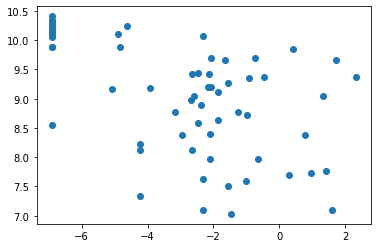

In [45]:
plt.scatter(perisk.barb2, perisk.gdpw2)


### Histogram

We can make a simple histogram using the function `.hist()`:

```
dat['variable'].hist()
plt.show()
```

And if we want overlapping histograms by a category:

```
dat[dat['vcat'] == 'v1']['variable'].hist()
dat[dat['vcat'] == 'v2']['variable'].hist()
plt.legend(["v1", "v2"])
plt.show()
```

Let's try?

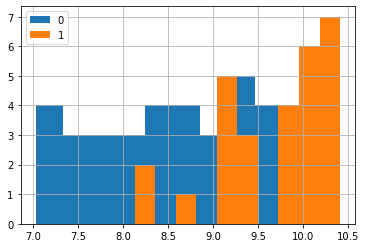

In [46]:
# My code here
perisk[perisk['courts'] == 0]['gdpw2'].hist()
perisk[perisk['courts'] == 1]['gdpw2'].hist()
plt.legend([0, 1])

**Exercise**: Make an histogram for `tip` in the `tips` dataset.

<AxesSubplot:>

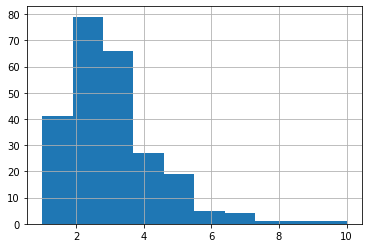

In [47]:
## Your answers here!
tips['tip'].hist()

**Great job!!!**